# How to train a model

In [7]:
using FastAI, Metalhead
import CairoMakie

## Finding a learning rate 

Using a good learning rate is important for a balance between model convergence and training speed, but finding one isn't always easy. FastAI.jl includes a learning rate finder that runs a mock training run with increasing learning rates to find a good one. You can use it with [`lrfind`](#).

In [5]:
data, blocks = loaddataset("imagenette2-160", (Image, Label))
task = ImageClassificationSingle(blocks)
learner = tasklearner(task, data; callbacks=[ToGPU(), Metrics(accuracy)])
finderresult = lrfind(learner)

Epoch 1 TrainingPhase():  11%|██▉                       |  ETA: 0:00:20

LRFindResult(
    FastAI.Steepest(0.98) => 0.0004786300923226385
    FastAI.MinDivByTen(0.98) => 0.0001202264434617413
)

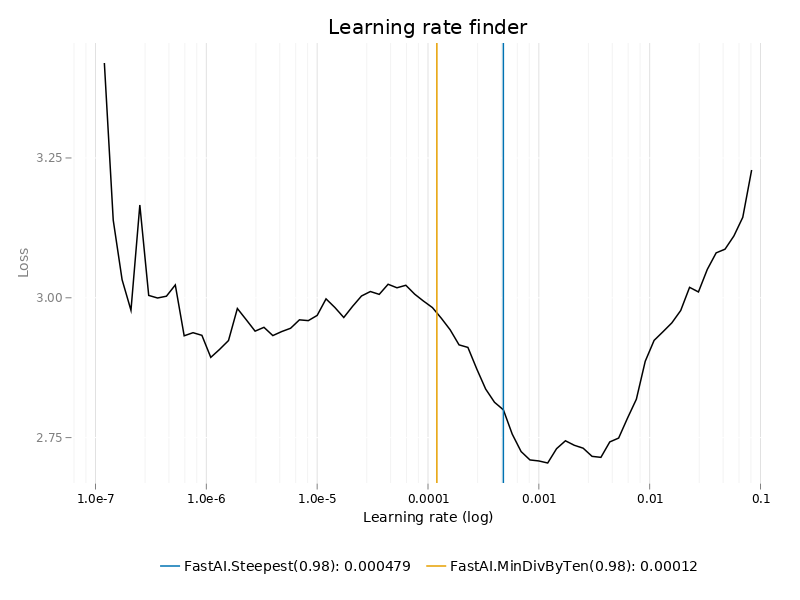

In [6]:
plot(finderresult)

## Training a model from scratch 

When using randomly intialized models like [`Models.xresnet18`](#), you can use [`fitonecycle!`](#) to train:

In [8]:
data, blocks = loaddataset("imagenette2-160", (Image, Label))
task = ImageClassificationSingle(blocks)
learner = tasklearner(task, data; callbacks=[ToGPU(), Metrics(accuracy)])
fitonecycle!(learner, 10, 0.0005)

Epoch 1 TrainingPhase(): 100%|██████████████████████████| Time: 0:00:21


┌───────────────┬───────┬────────┬──────────┐
│         Phase │ Epoch │   Loss │ Accuracy │
├───────────────┼───────┼────────┼──────────┤
│ TrainingPhase │   1.0 │ 1.9335 │  0.36369 │
└───────────────┴───────┴────────┴──────────┘


Epoch 1 ValidationPhase(): 100%|████████████████████████| Time: 0:00:01


┌─────────────────┬───────┬─────────┬──────────┐
│           Phase │ Epoch │    Loss │ Accuracy │
├─────────────────┼───────┼─────────┼──────────┤
│ ValidationPhase │   1.0 │ 1.55942 │  0.50503 │
└─────────────────┴───────┴─────────┴──────────┘


Epoch 2 TrainingPhase(): 100%|██████████████████████████| Time: 0:00:21


┌───────────────┬───────┬─────────┬──────────┐
│         Phase │ Epoch │    Loss │ Accuracy │
├───────────────┼───────┼─────────┼──────────┤
│ TrainingPhase │   2.0 │ 1.41822 │  0.54077 │
└───────────────┴───────┴─────────┴──────────┘


Epoch 2 ValidationPhase(): 100%|████████████████████████| Time: 0:00:01


┌─────────────────┬───────┬─────────┬──────────┐
│           Phase │ Epoch │    Loss │ Accuracy │
├─────────────────┼───────┼─────────┼──────────┤
│ ValidationPhase │   2.0 │ 1.26359 │  0.60629 │
└─────────────────┴───────┴─────────┴──────────┘


Epoch 3 TrainingPhase(): 100%|██████████████████████████| Time: 0:00:21


┌───────────────┬───────┬────────┬──────────┐
│         Phase │ Epoch │   Loss │ Accuracy │
├───────────────┼───────┼────────┼──────────┤
│ TrainingPhase │   3.0 │ 1.1057 │  0.63948 │
└───────────────┴───────┴────────┴──────────┘


Epoch 3 ValidationPhase(): 100%|████████████████████████| Time: 0:00:01


┌─────────────────┬───────┬─────────┬──────────┐
│           Phase │ Epoch │    Loss │ Accuracy │
├─────────────────┼───────┼─────────┼──────────┤
│ ValidationPhase │   3.0 │ 1.16902 │  0.63315 │
└─────────────────┴───────┴─────────┴──────────┘


Epoch 4 TrainingPhase(): 100%|██████████████████████████| Time: 0:00:21


┌───────────────┬───────┬─────────┬──────────┐
│         Phase │ Epoch │    Loss │ Accuracy │
├───────────────┼───────┼─────────┼──────────┤
│ TrainingPhase │   4.0 │ 0.86595 │  0.72071 │
└───────────────┴───────┴─────────┴──────────┘


Epoch 4 ValidationPhase(): 100%|████████████████████████| Time: 0:00:01


┌─────────────────┬───────┬─────────┬──────────┐
│           Phase │ Epoch │    Loss │ Accuracy │
├─────────────────┼───────┼─────────┼──────────┤
│ ValidationPhase │   4.0 │ 0.92913 │   0.7149 │
└─────────────────┴───────┴─────────┴──────────┘


Epoch 5 TrainingPhase(): 100%|██████████████████████████| Time: 0:00:21


┌───────────────┬───────┬─────────┬──────────┐
│         Phase │ Epoch │    Loss │ Accuracy │
├───────────────┼───────┼─────────┼──────────┤
│ TrainingPhase │   5.0 │ 0.67148 │  0.77421 │
└───────────────┴───────┴─────────┴──────────┘


Epoch 5 ValidationPhase(): 100%|████████████████████████| Time: 0:00:01


┌─────────────────┬───────┬────────┬──────────┐
│           Phase │ Epoch │   Loss │ Accuracy │
├─────────────────┼───────┼────────┼──────────┤
│ ValidationPhase │   5.0 │ 0.9128 │  0.72972 │
└─────────────────┴───────┴────────┴──────────┘


Epoch 6 TrainingPhase(): 100%|██████████████████████████| Time: 0:00:20


┌───────────────┬───────┬─────────┬──────────┐
│         Phase │ Epoch │    Loss │ Accuracy │
├───────────────┼───────┼─────────┼──────────┤
│ TrainingPhase │   6.0 │ 0.48106 │  0.84613 │
└───────────────┴───────┴─────────┴──────────┘


Epoch 6 ValidationPhase(): 100%|████████████████████████| Time: 0:00:01


┌─────────────────┬───────┬─────────┬──────────┐
│           Phase │ Epoch │    Loss │ Accuracy │
├─────────────────┼───────┼─────────┼──────────┤
│ ValidationPhase │   6.0 │ 0.85817 │  0.75493 │
└─────────────────┴───────┴─────────┴──────────┘


Epoch 7 TrainingPhase(): 100%|██████████████████████████| Time: 0:00:21


┌───────────────┬───────┬─────────┬──────────┐
│         Phase │ Epoch │    Loss │ Accuracy │
├───────────────┼───────┼─────────┼──────────┤
│ TrainingPhase │   7.0 │ 0.31033 │  0.90518 │
└───────────────┴───────┴─────────┴──────────┘


Epoch 7 ValidationPhase(): 100%|████████████████████████| Time: 0:00:01


┌─────────────────┬───────┬────────┬──────────┐
│           Phase │ Epoch │   Loss │ Accuracy │
├─────────────────┼───────┼────────┼──────────┤
│ ValidationPhase │   7.0 │ 0.8184 │  0.77651 │
└─────────────────┴───────┴────────┴──────────┘


Epoch 8 TrainingPhase(): 100%|██████████████████████████| Time: 0:00:21


┌───────────────┬───────┬─────────┬──────────┐
│         Phase │ Epoch │    Loss │ Accuracy │
├───────────────┼───────┼─────────┼──────────┤
│ TrainingPhase │   8.0 │ 0.18132 │  0.95093 │
└───────────────┴───────┴─────────┴──────────┘


Epoch 8 ValidationPhase(): 100%|████████████████████████| Time: 0:00:01


┌─────────────────┬───────┬─────────┬──────────┐
│           Phase │ Epoch │    Loss │ Accuracy │
├─────────────────┼───────┼─────────┼──────────┤
│ ValidationPhase │   8.0 │ 0.75323 │  0.79718 │
└─────────────────┴───────┴─────────┴──────────┘


Epoch 9 TrainingPhase(): 100%|██████████████████████████| Time: 0:00:21


┌───────────────┬───────┬─────────┬──────────┐
│         Phase │ Epoch │    Loss │ Accuracy │
├───────────────┼───────┼─────────┼──────────┤
│ TrainingPhase │   9.0 │ 0.11809 │  0.97276 │
└───────────────┴───────┴─────────┴──────────┘


Epoch 9 ValidationPhase(): 100%|████████████████████████| Time: 0:00:01


┌─────────────────┬───────┬─────────┬──────────┐
│           Phase │ Epoch │    Loss │ Accuracy │
├─────────────────┼───────┼─────────┼──────────┤
│ ValidationPhase │   9.0 │ 0.70874 │  0.80127 │
└─────────────────┴───────┴─────────┴──────────┘


Epoch 10 TrainingPhase(): 100%|█████████████████████████| Time: 0:00:22


┌───────────────┬───────┬─────────┬──────────┐
│         Phase │ Epoch │    Loss │ Accuracy │
├───────────────┼───────┼─────────┼──────────┤
│ TrainingPhase │  10.0 │ 0.09083 │  0.98246 │
└───────────────┴───────┴─────────┴──────────┘


Epoch 10 ValidationPhase(): 100%|███████████████████████| Time: 0:00:01


┌─────────────────┬───────┬─────────┬──────────┐
│           Phase │ Epoch │    Loss │ Accuracy │
├─────────────────┼───────┼─────────┼──────────┤
│ ValidationPhase │  10.0 │ 0.69928 │  0.79964 │
└─────────────────┴───────┴─────────┴──────────┘


## Finetuning a pretrained model 

When finetuning a pretrained model, it is recommended to use [`finetune!`](#) which uses a warmup schedule to train the newly initiliazed head more quickly than the pretrained backbone.

In [ ]:
data, blocks = loaddataset("imagenette2-160", (Image, Label))
task = ImageClassificationSingle(blocks)
learner = tasklearner(task, data;
    backbone=Metalhead.ResNet50(pretrain=true).layers[1][1:end-1],
    callbacks=[ToGPU(), Metrics(accuracy)])
finetune!(learner, 5, 0.0005)